##Q(1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


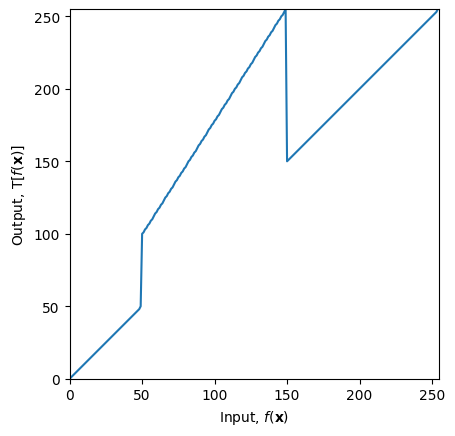

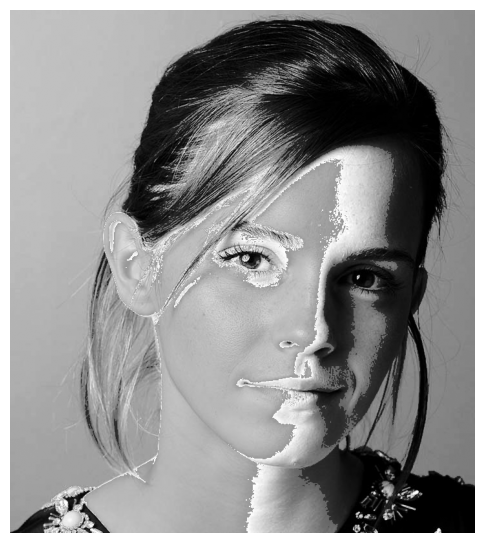

In [36]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

image_path = '/content/drive/MyDrive/openCV/a1images/a1images/emma.jpg'
img = cv.imread(image_path,cv.IMREAD_GRAYSCALE)

c= np.array([(50,50),(50,100),(150,255),(150,150),(255,255)])
t1=np.linspace(0,c[0,1],c[0,1]+1).astype('uint8')
t2=np.linspace(c[1,1]+1,c[2,1],c[1,1]).astype('uint8')
t3=np.linspace(c[2,0]+1,c[4,0],c[4,0]-c[3,0]).astype('uint8')

transform = np.concatenate([t1, t2, t3])
img_transformed = cv.LUT(img,transform)

fig, ax = plt.subplots()
ax.plot(t)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.show()


fig,ax = plt.subplots(1,1,figsize=(6,8))
ax.imshow(img_transformed,cmap='gray',vmin=0,vmax=255)
ax.axis('off')
plt.show()


##Q(2)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


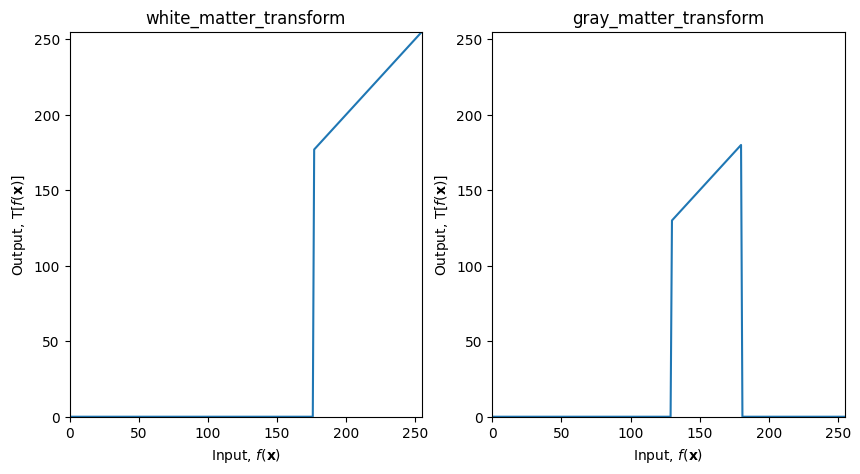

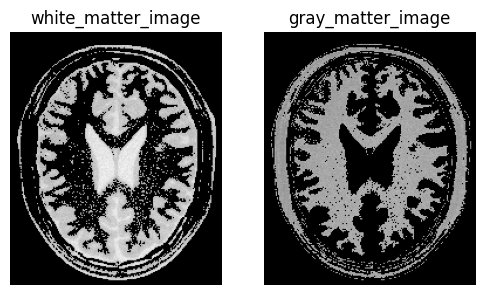

In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

image_path = '/content/drive/MyDrive/openCV/a1images/a1images/brain_proton_density_slice.png'
image = cv.imread(image_path,cv.IMREAD_GRAYSCALE)

white_threshold_upper = 255
white_threshold_lower = 177
white_matter_transform1 = np.linspace(0,0,white_threshold_lower,dtype='uint8')
white_matter_transform2 = np.linspace(white_threshold_lower,white_threshold_upper,white_threshold_upper-white_threshold_lower+1,dtype='uint8')
white_matter_transform = np.concatenate([white_matter_transform1,white_matter_transform2])

white_matter_image = cv.LUT(image,white_matter_transform)

gray_threshold_lower = 130
gray_threshold_upper = 180
gray_matter_transform1 = np.linspace(0,0,gray_threshold_lower,dtype='uint8')
gray_matter_transform2 = np.linspace(gray_threshold_lower,gray_threshold_upper,gray_threshold_upper-gray_threshold_lower+1,dtype='uint8')
gray_matter_transform3 = np.linspace(0,0,255-gray_threshold_upper,dtype='uint8')
gray_matter_transform = np.concatenate([gray_matter_transform1,gray_matter_transform2,gray_matter_transform3])

gray_matter_image = cv.LUT(image,gray_matter_transform)

fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(white_matter_transform)
ax[0].set_title('white_matter_transform')
ax[0].set_xlabel(r'Input, $f(\mathbf{x})$')
ax[0].set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax[0].set_xlim(0,255)
ax[0].set_ylim(0,255)
#ax[0].set_aspect('equal')

ax[1].plot(gray_matter_transform)
ax[1].set_xlabel(r'Input, $f(\mathbf{x})$')
ax[1].set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax[1].set_title('gray_matter_transform')
ax[1].set_xlim(0,255)
ax[1].set_ylim(0,255)
#ax[1].set_aspect('equal')
plt.show()


fig,ax = plt.subplots(1,2,figsize=(6,8))
ax[0].imshow(white_matter_image,cmap='gray',vmin=0,vmax=255)
ax[0].set_title('white_matter_image')
ax[0].axis('off')
ax[1].imshow(gray_matter_image,cmap='gray',vmin=0,vmax=255)
ax[1].set_title('gray_matter_image')
ax[1].axis('off')
plt.show()

##Q(3)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


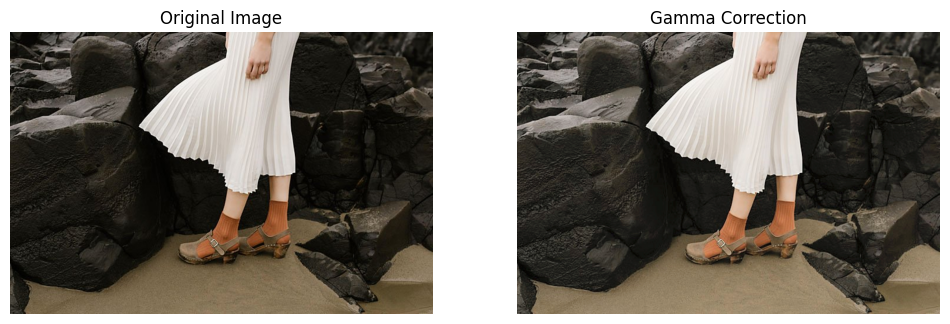

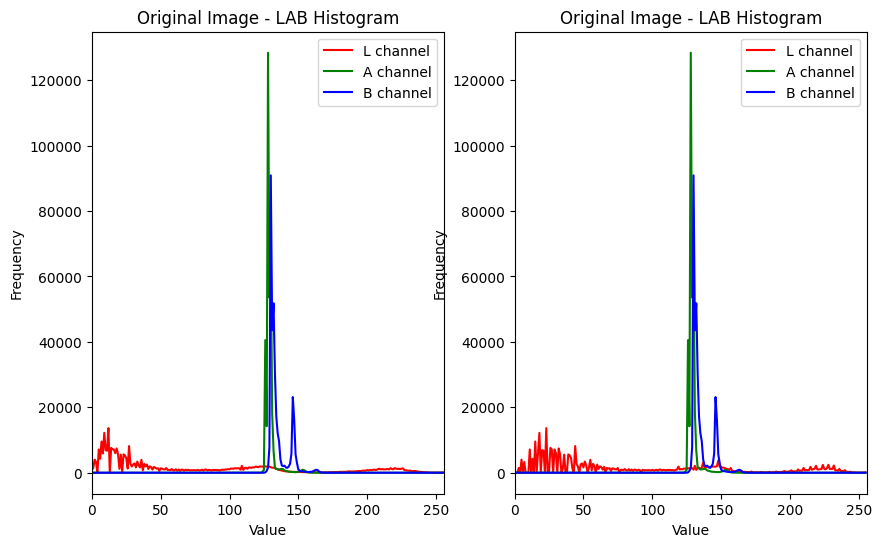

In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
f=cv.imread('/content/drive/MyDrive/openCV/a1images/a1images/highlights_and_shadows.jpg')

img_lab = cv.cvtColor(f,cv.COLOR_BGR2LAB)
L,a,b = cv.split(img_lab)

gamma = 0.78

t = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')

gamma_corrected_l_channel = cv.LUT(L,t)
gamma_image = cv.merge([gamma_corrected_l_channel,a,b])
corrected_image = cv.cvtColor(gamma_image,cv.COLOR_LAB2BGR)

fig,ax=plt.subplots(1,2,figsize=(12,8))
ax[0].imshow(cv.cvtColor(f,cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv.cvtColor(corrected_image,cv.COLOR_BGR2RGB))
ax[1].set_title('Gamma Correction')
for a in ax:
  a.axis('off')
plt.show()

channels = ['L','A','B']
colors = ['red','green','blue']

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
for i,col in enumerate(colors):
  hist = cv.calcHist([img_lab],[i],None,[256],[0,256])
  plt.plot(hist,color=col,label = f'{channels[i]} channel')
  plt.xlim([0,256])
plt.title('Original Image - LAB Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1,2,2)
for i,col in enumerate(colors):
  hist = cv.calcHist([gamma_image],[i],None,[256],[0,256])
  plt.plot(hist,color=col,label = f'{channels[i]} channel')
  plt.xlim([0,256])
plt.title('Original Image - LAB Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()



##Q(4)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


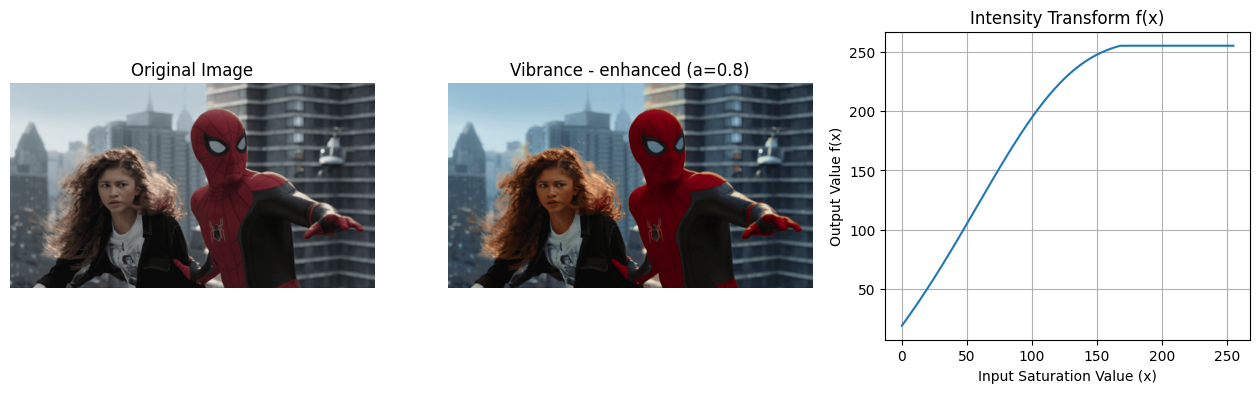

In [22]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from google.colab import drive
drive.mount('/content/drive')
f=cv.imread('/content/drive/MyDrive/openCV/a1images/a1images/spider.png')

a=0.8 #vibrance strength , range [0,1]
sigma = 70.0

#Convert to HSV
hsv=cv.cvtColor(f,cv.COLOR_BGR2HSV).astype(np.float32)
H,S,V = cv.split(hsv)

def vibrance_transform(x , a , sigma):
  exponent = -((x-128.0)**2)/(2.0*(sigma**2))
  delta = a*np.exp(exponent)*128
  y=x+delta
  return np.minimum(y,255.0)

s_trans = vibrance_transform(S, a=a , sigma=sigma) # Apply transform to Saturation plane

hsv_trans = cv.merge([H , s_trans , V]).astype(np.uint8)

gsv_trans_image = cv.cvtColor(hsv_trans,cv.COLOR_HSV2BGR)
gsv_trans_image = cv.cvtColor(gsv_trans_image,cv.COLOR_BGR2RGB)

x_vals = np.arange(0,256)
y_vals = vibrance_transform(x_vals.astype(np.float32) , a , sigma)

plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
plt.imshow(cv.cvtColor(f,cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(gsv_trans_image)
plt.title(f"Vibrance - enhanced (a={a})")
plt.axis('off')

plt.subplot(1,3,3)
plt.plot(x_vals , y_vals)
plt.title("Intensity Transform f(x)")
plt.xlabel("Input Saturation Value (x)")
plt.ylabel("Output Value f(x)")
plt.xaxis = MaxNLocator(integer = True)
plt.grid(True)
#plt.tight_layout()
plt.show()